## Results of Cartpole Simulations

In [22]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [23]:
results_dir = 'results'
sub_dir = 'CartPole-BT-dL-v0'
os.listdir(results_dir)

['CartPole-BT-v0',
 '.DS_Store',
 'CartPole-BT-vH-v0',
 'CartPole-BT-vL-v0',
 'CartPole-BT-dL-v0']

In [24]:
filename = 'param_sweep_results.csv'
filepath = os.path.join(results_dir, sub_dir, filename)
results = pd.read_csv(filepath, header=None)
results.columns = ['x0', 'x1', 'x2', 'x3', 'Cum Reward']
len(results)

194481

In [19]:
results.head()

,x0,x1,x2,x3,Cum Reward
0,-500.0,-500.0,-2500.0,-2500.0,-2.012882e+06
1,-500.0,-500.0,-2500.0,-2250.0,-1.945189e+06
2,-500.0,-500.0,-2500.0,-2000.0,-2.014953e+06
3,-500.0,-500.0,-2500.0,-1750.0,-1.936088e+06
4,-500.0,-500.0,-2500.0,-1500.0,-2.011543e+06


In [20]:
param_values = {label: results[label].unique() for label in ['x0', 'x1', 'x2', 'x3']}
param_values

{'x0': array([-500., -450., -400., -350., -300., -250., -200., -150., -100.,
         -50.,    0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,
         400.,  450.,  500.]),
 'x1': array([-500., -450., -400., -350., -300., -250., -200., -150., -100.,
         -50.,    0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,
         400.,  450.,  500.]),
 'x2': array([-2500., -2250., -2000., -1750., -1500., -1250., -1000.,  -750.,
         -500.,  -250.,     0.,   250.,   500.,   750.,  1000.,  1250.,
         1500.,  1750.,  2000.,  2250.,  2500.]),
 'x3': array([-2500., -2250., -2000., -1750., -1500., -1250., -1000.,  -750.,
         -500.,  -250.,     0.,   250.,   500.,   750.,  1000.,  1250.,
         1500.,  1750.,  2000.,  2250.,  2500.])}

In [28]:
param_min_max = {
    param: (values.min(), values.max()) for param, values in param_values.items()
}
param_min_max

{'x0': (-500.0, 500.0),
 'x1': (-500.0, 500.0),
 'x2': (-2500.0, 2500.0),
 'x3': (-2500.0, 2500.0)}

In [14]:
results['Cum Reward'].min(), results['Cum Reward'].max()

(-2242385.6744955927, -0.0002442803787247315)

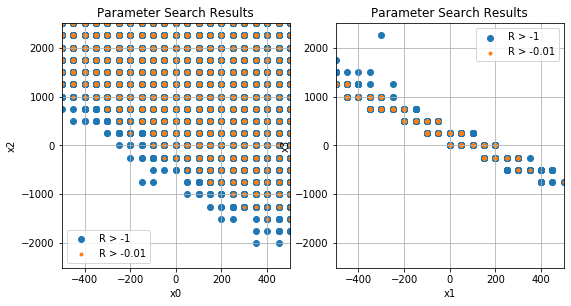

In [47]:
def cum_rewards_plot(ax, results, x_label, y_label, title='Parameter Search Results'):

    param_min_max = {
        param: (values.min(), values.max()) 
        for param, values in param_values.items()
    }
    
    best_rewards = results['Cum Reward'] > -0.01
    high_rewards = results['Cum Reward'] > -0.5

    x = results.loc[high_rewards, x_label]
    y = results.loc[high_rewards, y_label]
    ax.scatter(x, y, marker='o', label='R > -1')

    x = results.loc[best_rewards, x_label]
    y = results.loc[best_rewards, y_label]
    ax.scatter(x, y, marker='.', label='R > -0.01')

    ax.set_title(title)
    ax.set_xlim(param_min_max[x_label][0], param_min_max[x_label][1])
    ax.set_ylim(param_min_max[y_label][0], param_min_max[y_label][1])
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.legend()
    ax.grid()

fig, axes = plt.subplots(1, 2, figsize=(9, 4.5))

cum_rewards_plot(axes[0], results, x_label='x0', y_label='x2')
cum_rewards_plot(axes[1], results, x_label='x1', y_label='x3')

plt.savefig('param-search-results.png')
plt.show()

